**IMPORTING LIBRARIES**

In [315]:
#importing libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sbn
import numpy as np


**LOADING DATASET**

In [316]:
#Displays the first 5 records of the dataset
dt = pd.read_csv('Prostate_Cancer_Prediction.csv',index_col=0)
dt.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,,,,,,,,,
1,M,23,12,151,954,0.143,0.278,0.242,0.079
2,B,9,13,133,1326,0.143,0.079,0.181,0.057
3,M,21,27,130,1203,0.125,0.160,0.207,0.060
4,M,14,16,78,386,0.070,0.284,0.260,0.097
5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [317]:
dt.info

<bound method DataFrame.info of     diagnosis_result  radius  texture  ...  compactness  symmetry  fractal_dimension
id                                     ...                                          
1                  M      23       12  ...        0.278     0.242              0.079
2                  B       9       13  ...        0.079     0.181              0.057
3                  M      21       27  ...        0.160     0.207              0.060
4                  M      14       16  ...        0.284     0.260              0.097
5                  M       9       19  ...        0.133     0.181              0.059
..               ...     ...      ...  ...          ...       ...                ...
96                 M      23       16  ...        0.131     0.210              0.056
97                 B      22       14  ...        0.071     0.190              0.066
98                 B      19       27  ...        0.053     0.135              0.069
99                 B      21     

Missing Values

*   Shows any missing values in each column

In [318]:
#Checks for missing data in dataset
dt.isnull().any

<bound method DataFrame.any of      diagnosis_result  radius  ...  symmetry  fractal_dimension
id                             ...                             
1               False   False  ...     False              False
2               False   False  ...     False              False
3               False   False  ...     False              False
4               False   False  ...     False              False
5               False   False  ...     False              False
..                ...     ...  ...       ...                ...
96              False   False  ...     False              False
97              False   False  ...     False              False
98              False   False  ...     False              False
99              False   False  ...     False              False
100             False   False  ...     False              False

[100 rows x 9 columns]>

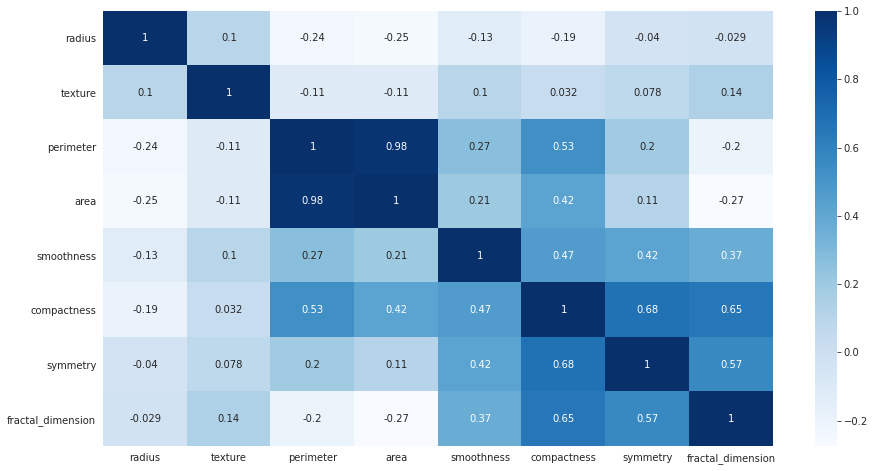

In [319]:
#Displays number of times the target value appears
plt.figure(figsize=(15,8))
sbn.heatmap(dt.corr(),cmap='Blues', annot= True)
plt.show()

In [320]:
# converting to binary
new_dt=pd.get_dummies(dt,columns=['diagnosis_result'],drop_first=True)

In [321]:
new_dt.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result_M
id,,,,,,,,,
1,23,12,151,954,0.143,0.278,0.242,0.079,1
2,9,13,133,1326,0.143,0.079,0.181,0.057,0
3,21,27,130,1203,0.125,0.160,0.207,0.060,1
4,14,16,78,386,0.070,0.284,0.260,0.097,1
5,9,19,135,1297,0.141,0.133,0.181,0.059,1


In [322]:
dt.shape

(100, 9)

In [323]:
#using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(new_dt.drop('diagnosis_result_M',axis=1))
#removing the last column of the dataframe as this table will be used for the feature matrix
scaled_features=scaler.transform(new_dt.drop('diagnosis_result_M',axis=1))
new_data=pd.DataFrame(scaled_features,columns=new_dt.columns[:-1])

In [324]:
new_dt.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result_M
id,,,,,,,,,
1,23,12,151,954,0.143,0.278,0.242,0.079,1
2,9,13,133,1326,0.143,0.079,0.181,0.057,0
3,21,27,130,1203,0.125,0.160,0.207,0.060,1
4,14,16,78,386,0.070,0.284,0.260,0.097,1
5,9,19,135,1297,0.141,0.133,0.181,0.059,1


**Testing using kNN algorithm**


In [325]:
#feature matrix
X=new_data

In [326]:
#target matrix
y=new_dt['diagnosis_result_M']

Splitting Data

In [327]:
#allocating 45% of the dataset for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45)

In [328]:
# random value of n_neighbors, we will find a better value of k later.
knn = KNeighborsClassifier(n_neighbors=1)

In [329]:
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [330]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.47      0.59        17
           1       0.74      0.93      0.83        28

    accuracy                           0.76        45
   macro avg       0.77      0.70      0.71        45
weighted avg       0.76      0.76      0.74        45



In [331]:

error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

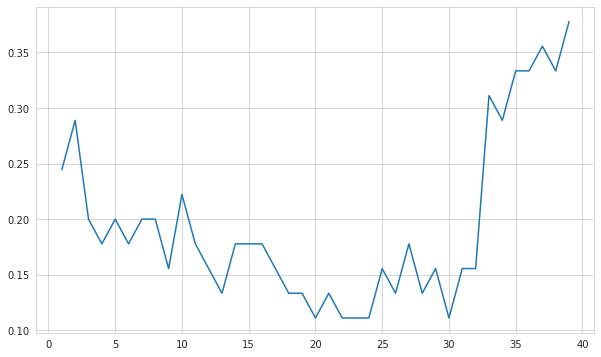

In [332]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)

In [333]:
knn=KNeighborsClassifier(n_neighbors=3)

In [334]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [335]:
new_pred=knn.predict(X_test)

In [336]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       0.90      0.53      0.67        17
           1       0.77      0.96      0.86        28

    accuracy                           0.80        45
   macro avg       0.84      0.75      0.76        45
weighted avg       0.82      0.80      0.79        45



In [337]:
dt.describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


**Class Distribution**

In [338]:
# Class distribution
print(dt.groupby('radius').size())

radius
9      4
10    11
11     8
12     5
14     5
15     5
16     8
17     6
18     6
19     9
20     6
21     6
22     7
23     5
24     3
25     6
dtype: int64


**Data Visualization**

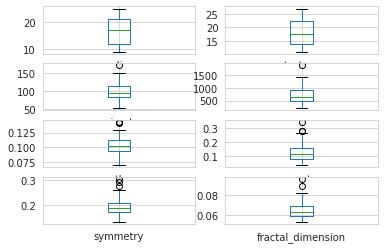

In [339]:
# Visualization
dt.plot(kind='box', subplots=True, layout=(4,2), sharex=False)
plt.show()

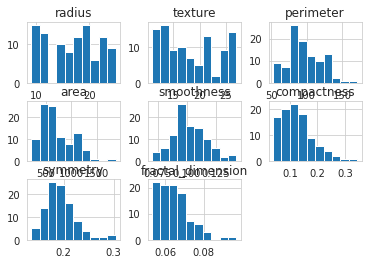

In [340]:
# histogram
dt.hist()
plt.show()

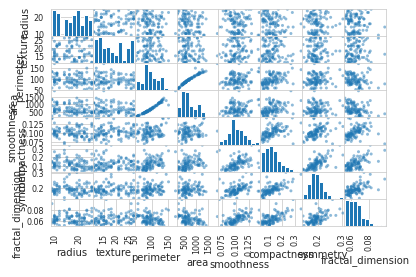

In [341]:
# scatter plot
scatter_matrix(dt)
plt.show()

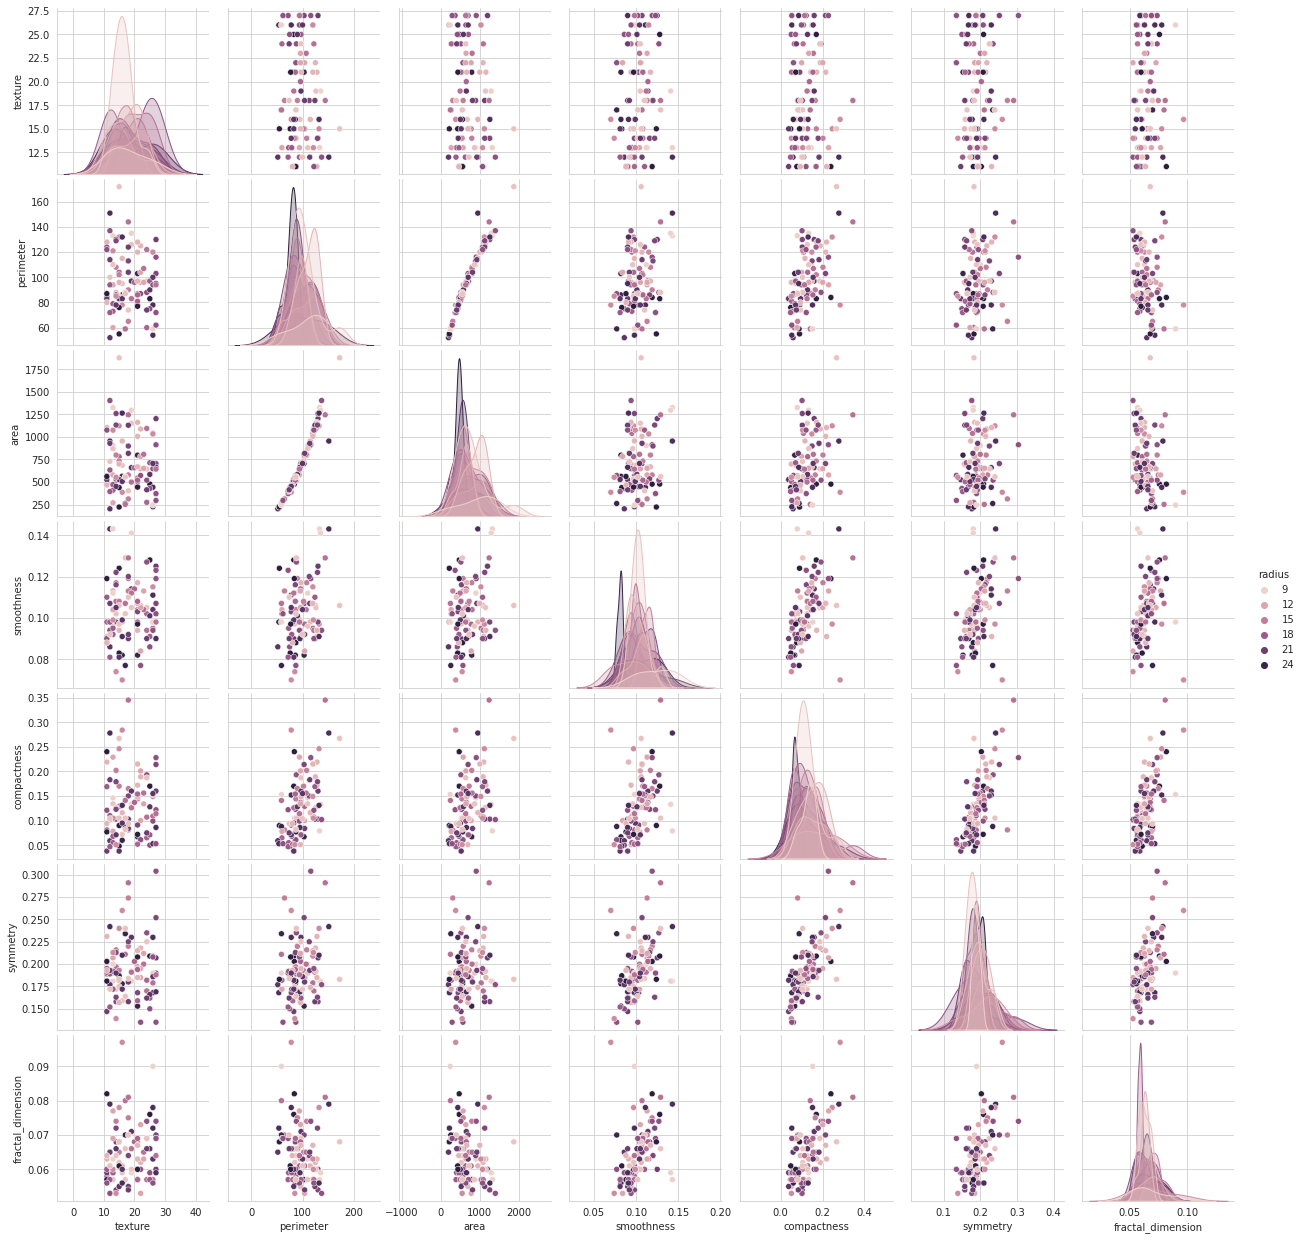

In [342]:
# seaborn
sbn.pairplot(dt, hue='radius')